In [ ]:
!pip install torchviz

In [1]:
#%% packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

In [2]:
#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

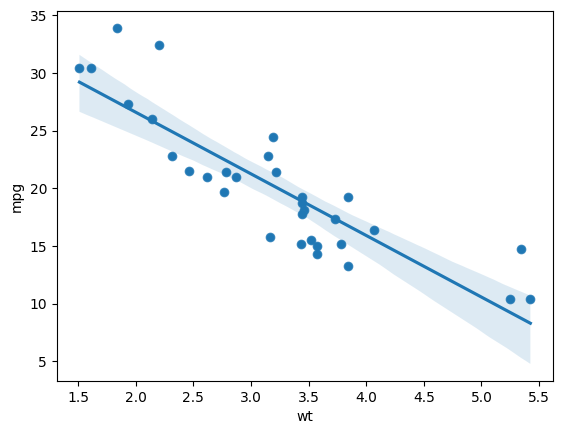

In [3]:
#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [4]:
#%% convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

In [6]:
#%% training
w = torch.rand(1, requires_grad=True, dtype=torch.float64)
b = torch.rand(1, requires_grad=True, dtype=torch.float64)

num_epochs = 100
learning_rate = 1e-3
for epoch in range(num_epochs):
  for i in range(len(X)):
    # x, y = torch.tensor(X_list[i]), torch.tensor(y_list[i])
    # forward pass
    y_predict = X[i] * w + b
    # calculate loss
    loss_tensor = torch.pow(y_predict - y[i], 2)
    # backward pass
    loss_tensor.backward()
    # extract losses
    loss_value = loss_tensor.data[0]
    # update weights and biases
    with torch.no_grad():
      w -= w.grad * learning_rate
      b -= b.grad * learning_rate
      w.grad.zero_()
      b.grad.zero_()
  print(loss_value)

tensor(135.1266, dtype=torch.float64)
tensor(72.9318, dtype=torch.float64)
tensor(50.7927, dtype=torch.float64)
tensor(41.8545, dtype=torch.float64)
tensor(37.8702, dtype=torch.float64)
tensor(35.9145, dtype=torch.float64)
tensor(34.8318, dtype=torch.float64)
tensor(34.1356, dtype=torch.float64)
tensor(33.6136, dtype=torch.float64)
tensor(33.1718, dtype=torch.float64)
tensor(32.7681, dtype=torch.float64)
tensor(32.3838, dtype=torch.float64)
tensor(32.0103, dtype=torch.float64)
tensor(31.6437, dtype=torch.float64)
tensor(31.2824, dtype=torch.float64)
tensor(30.9256, dtype=torch.float64)
tensor(30.5728, dtype=torch.float64)
tensor(30.2238, dtype=torch.float64)
tensor(29.8786, dtype=torch.float64)
tensor(29.5371, dtype=torch.float64)
tensor(29.1992, dtype=torch.float64)
tensor(28.8649, dtype=torch.float64)
tensor(28.5341, dtype=torch.float64)
tensor(28.2069, dtype=torch.float64)
tensor(27.8831, dtype=torch.float64)
tensor(27.5628, dtype=torch.float64)
tensor(27.2459, dtype=torch.float64)


In [7]:
#%% check results
print(f"Weight: {w.item()}, Bias: {b.item()}")

Weight: 0.8846403052661552, Bias: 15.63253083662586


In [8]:
# %%
y_pred = (torch.tensor(X_list)*w+b).detach().numpy()

<Axes: >

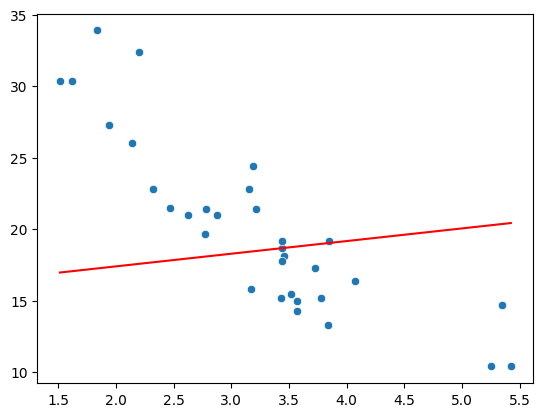

In [9]:
# %%
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')

In [10]:
# %% (Statistical) Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")

Slope: [-5.3444715], Bias: 37.285125732421875


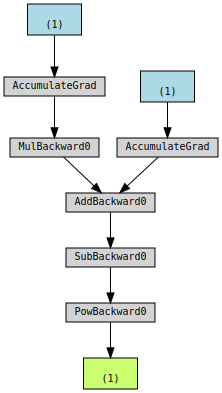

In [15]:
# %% create graph visualisation
# make sure GraphViz is installed (https://graphviz.org/download/)
# if not computer restarted, append directly to PATH variable
import os
from torchviz import make_dot
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
make_dot(loss_tensor)